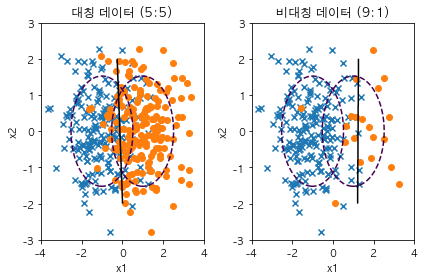

In [14]:
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import matplotlib
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def classification_result(n0, n1, title=""):
    rv1 = sp.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
    rv2 = sp.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
    X0 = rv1.rvs(n0, random_state=0)
    X1 = rv2.rvs(n1, random_state=0)
    X = np.vstack([X0, X1])
    y = np.hstack([np.zeros(n0), np.ones(n1)])

    x1min = -4; x1max = 4
    x2min = -2; x2max = 2
    xx1 = np.linspace(x1min, x1max, 1000)
    xx2 = np.linspace(x2min, x2max, 1000)
    X1, X2 = np.meshgrid(xx1, xx2)

    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")

    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="0 클래스")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="1 클래스")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    
    return model, X, y, y_pred
    
plt.subplot(121)
model1, X1, y1, y_pred1 = classification_result(200, 200, "대칭 데이터 (5:5)")
plt.subplot(122)
model2, X2, y2, y_pred2 = classification_result(200, 20, "비대칭 데이터 (9:1)")
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84       200
         1.0       0.84      0.86      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       200
         1.0       0.75      0.60      0.67        20

    accuracy                           0.95       220
   macro avg       0.86      0.79      0.82       220
weighted avg       0.94      0.95      0.94       220



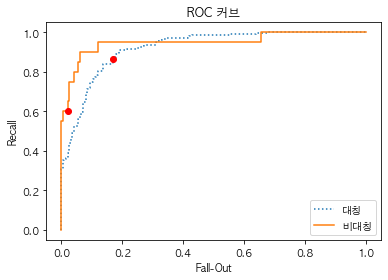

In [20]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y1, y_pred1)) 
print(classification_report(y2, y_pred2))

from sklearn.metrics import roc_curve, confusion_matrix 
fpr1, tpr1, thresholds1 = roc_curve(y1, model1.decision_function(X1)) 
fpr2, tpr2, thresholds2 = roc_curve(y2, model2.decision_function(X2)) 

c1 = confusion_matrix(y1, y_pred1, labels=[1, 0]) 
c2 = confusion_matrix(y2, y_pred2, labels=[1, 0]) 
r1 = c1[0, 0] / (c1[0, 0] + c1[0, 1]) 
r2 = c2[0, 0] / (c2[0, 0] + c2[0, 1]) 
f1 = c1[1, 0] / (c1[1, 0] + c1[1, 1]) 
f2 = c2[1, 0] / (c2[1, 0] + c2[1, 1]) 

plt.plot(fpr1, tpr1, ':', label="대칭") 
plt.plot(fpr2, tpr2, '-', label="비대칭")
plt.plot([f1], [r1], 'ro')
plt.plot([f2], [r2], 'ro')
plt.legend()
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('ROC 커브')
plt.show()
